In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#load the dataset into dataframe
#import the libraries
import pandas as pd
df=pd.read_csv("New loan data.csv")

In [ ]:
print(df.head(10))

    Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1        1        1           1          1              0             4583   
2        1        1           0          1              1             3000   
3        1        1           0          0              0             2583   
4        1        0           0          1              0             6000   
5        1        1           2          1              1             5417   
6        1        1           0          0              0             2333   
7        1        1           4          1              0             3036   
8        1        1           2          1              0             4006   
9        1        1           1          1              0            12841   
10       1        1           2          1              0             3200   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1              1508.0       128.0             360.0             1.0   

In [ ]:
#statical description of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#No. of rows and columns in the dataset
df.shape

(614, 13)

In [ ]:
# Check for duplicate values in the Loan_ID column
duplicate_loan_ids = df["Loan_ID"].duplicated().sum()

# Print the number of duplicates
print(f"Number of duplicate Loan_IDs: {duplicate_loan_ids}")

Number of duplicate Loan_IDs: 0


In [ ]:
#Count the null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# dropping the loan id because it has no impact on prediction
df=df.drop("Loan_ID",axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
#Handling missing values
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
#find null values percentage in each column
df.isnull().mean()*100

,0
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Credit_History,8.143322


In [ ]:
df=df.dropna(subset=["Gender","Married","Dependents","Loan_Amount_Term","LoanAmount"])

In [ ]:
df.shape

(553, 12)

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,30
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,48


In [ ]:
df.isnull().mean()*100

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,5.424955
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [ ]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df["Self_Employed"].mode()

,Self_Employed
0,No


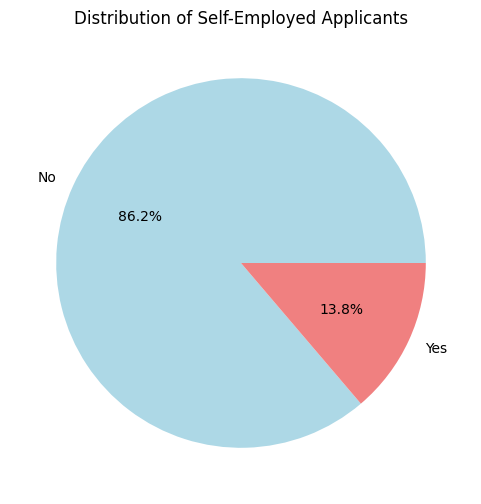

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the "Self_Employed" column
self_employed_counts = df["Self_Employed"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(self_employed_counts, labels=self_employed_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add a title
plt.title("Distribution of Self-Employed Applicants")

# Show the plot
plt.show()


In [ ]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [ ]:
df["Credit_History"].mode()

,Credit_History
0,1.0


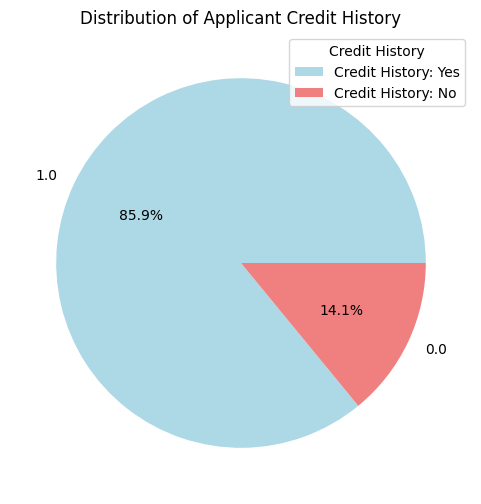

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the "Credit_History" column
credit_history_counts = df["Credit_History"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, _, _ = plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add a legend
plt.legend(["Credit History: Yes", "Credit History: No"], title="Credit History")

# Add a title
plt.title("Distribution of Applicant Credit History")

# Show the plot
plt.show()


In [ ]:
## fill the missing values
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      553 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB


In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 4).astype(int)


In [ ]:
df['Dependents'].unique()

array([1, 0, 2, 4])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    int64  
 3   Education          553 non-null    object 
 4   Self_Employed      553 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 56.2+ KB


In [ ]:
encoding={
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Dependents':{'0':0,'1':1,'2':2,'4':4},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Loan_Status':{'Y':1,'N':0},
}

In [ ]:
df.replace(encoding,inplace=True)

<ipython-input-33-266babc2cf56>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    int64  
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    int64  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int64  
 11  Loan_Status        553 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 56.2 KB


In [ ]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# Standarize the columns
nums_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
scaler=StandardScaler()
X[nums_cols]=scaler.fit_transform(X[nums_cols])

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,2
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,2
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,2
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,2


In [ ]:
X.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    int64  
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    int64  
 5   ApplicantIncome    553 non-null    float64
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 51.8 KB


In [ ]:
def evaluate_model(model):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    # model.fit(X_train, y_train)
    model.fit(X_train,y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cross_val = cross_val_score(model, X, y, cv=5)
    avg_cross_val = np.mean(cross_val)

    # Print results
    print(f"{model.__class__.__name__} - Accuracy: {accuracy:.2f}, Cross-Val Score: {avg_cross_val:.2f}")

    return avg_cross_val

In [ ]:
models=[
    LogisticRegression(),
    svm.SVC(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
      RandomForestClassifier(),
]

In [ ]:
model_score={model.__class__.__name__:evaluate_model(model)for model in models}

LogisticRegression - Accuracy: 0.79, Cross-Val Score: 0.80
SVC - Accuracy: 0.80, Cross-Val Score: 0.79
GradientBoostingClassifier - Accuracy: 0.77, Cross-Val Score: 0.77
DecisionTreeClassifier - Accuracy: 0.76, Cross-Val Score: 0.70
RandomForestClassifier - Accuracy: 0.77, Cross-Val Score: 0.78


In [ ]:
def tune_model(model,param_grid):
    tuner=RandomizedSearchCV(model,param_grid,cv=5,n_iter=20,verbose=True,random_state=42)
    tuner.fit(X,y)
    print(f"Best score for {model.__class__.__name__}:{tuner.best_score_:.2f}")
    print(f"Best parameter for {model.__class__.__name__}:{tuner.best_params_}")
    return tuner.best_estimator_

In [ ]:
log_reg_grid={'C':np.logspace(-4,4,20),"solver":["liblinear"]}
svc_grid={'C':[0.25,.50,.75,1],"kernel":['linear']}
rf_grid={
    'n_estimators':np.arange(10,1000,10),
    'max_features':['log2','sqrt'],
    'max_depth':[None,3,5,10,20,30],
    'min_samples_split':[2,5,20,50,100], # Changed 'min_samples-split' to 'min_samples_split'
    'min_samples_leaf':[1,2,5,10]
}

In [ ]:
best_log_reg=tune_model(LogisticRegression(),log_reg_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score for LogisticRegression:0.80
Best parameter for LogisticRegression:{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}


In [ ]:
best_svc_reg=tune_model(svm.SVC(),svc_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best score for SVC:0.81
Best parameter for SVC:{'kernel': 'linear', 'C': 0.25}


In [ ]:
best_rf=tune_model(RandomForestClassifier(),rf_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score for RandomForestClassifier:0.81
Best parameter for RandomForestClassifier:{'n_estimators': np.int64(690), 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


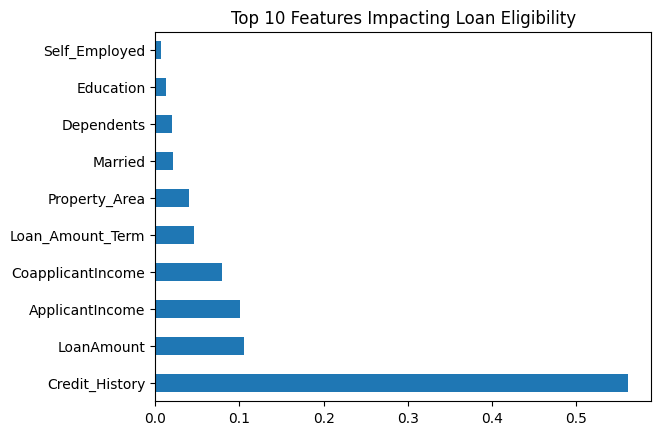

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'best_rf' is your trained RandomForestClassifier
model = best_rf

# Get feature importance scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot top 10 important features
feature_importance.nlargest(10).plot(kind='barh', title='Top 10 Features Impacting Loan Eligibility')
plt.show()

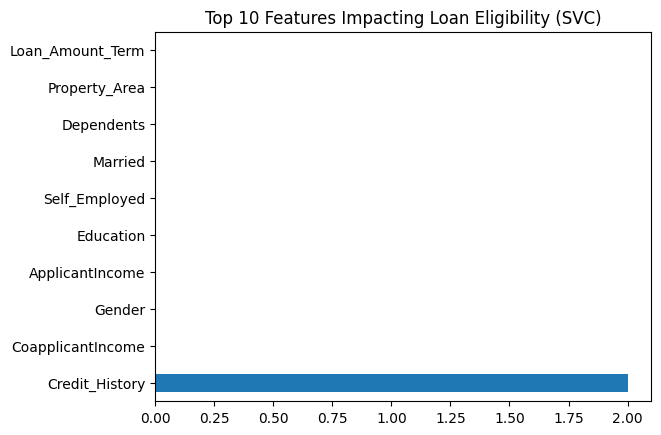

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'best_svc_reg' is your trained SVC model
model = best_svc_reg

# Get feature importance scores using coefficients (for linear kernel)
if model.kernel == 'linear':
    feature_importance = pd.Series(abs(model.coef_[0]), index=X.columns)
    feature_importance.nlargest(10).plot(kind='barh', title='Top 10 Features Impacting Loan Eligibility (SVC)')
    plt.show()
else:
    print("Feature importance is not directly available for non-linear kernels in SVC.")

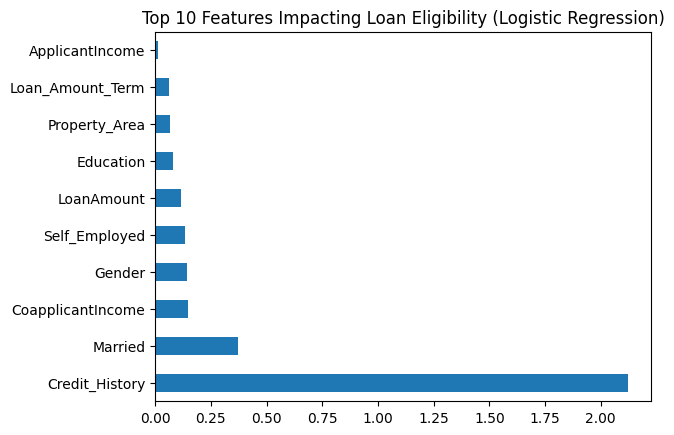

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'best_log_reg' is your trained LogisticRegression model
model = best_log_reg

# Get feature importance scores using coefficients
feature_importance = pd.Series(abs(model.coef_[0]), index=X.columns)

# Plot top 10 important features
feature_importance.nlargest(10).plot(kind='barh', title='Top 10 Features Impacting Loan Eligibility (Logistic Regression)')
plt.show()

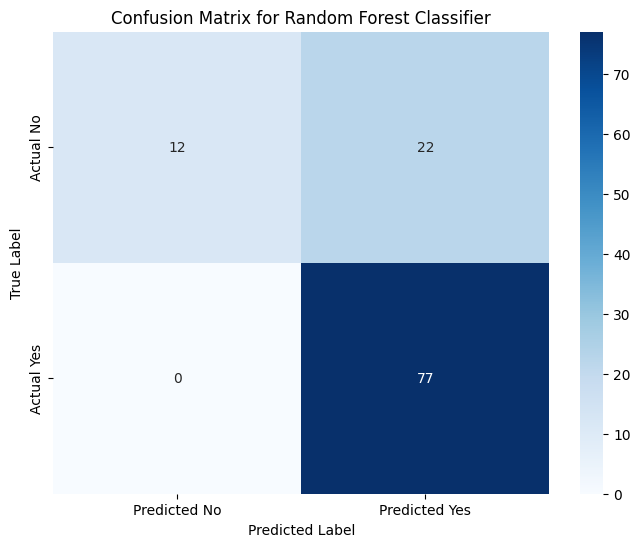

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        34
           1       0.78      1.00      0.88        77

    accuracy                           0.80       111
   macro avg       0.89      0.68      0.70       111
weighted avg       0.85      0.80      0.77       111



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best Random Forest model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

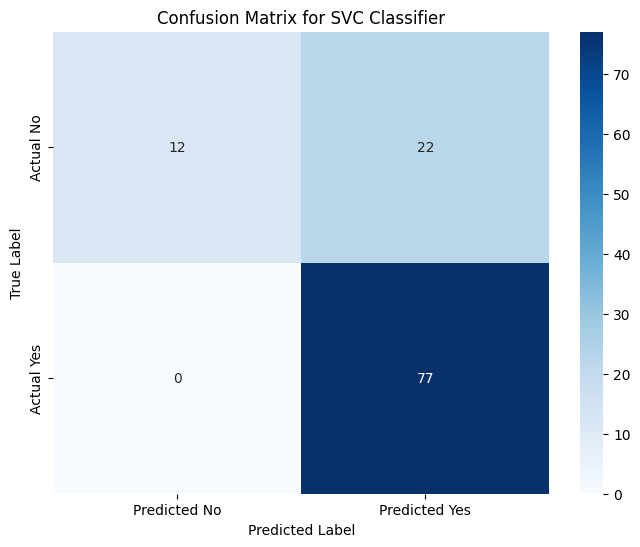

Classification Report for SVC Classifier:

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        34
           1       0.78      1.00      0.88        77

    accuracy                           0.80       111
   macro avg       0.89      0.68      0.70       111
weighted avg       0.85      0.80      0.77       111

--------------------------------------------------


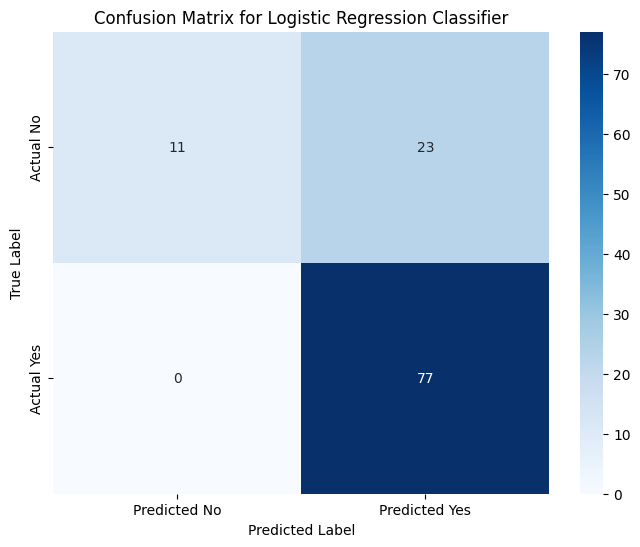

Classification Report for Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        34
           1       0.77      1.00      0.87        77

    accuracy                           0.79       111
   macro avg       0.89      0.66      0.68       111
weighted avg       0.84      0.79      0.75       111

--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming X, y, best_svc_reg, and best_log_reg are already defined

# Function to plot confusion matrix and print classification report
def plot_confusion_matrix_and_report(model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Train the model if not already trained
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Separator

# Generate confusion matrices and reports
plot_confusion_matrix_and_report(best_svc_reg, "SVC Classifier")
plot_confusion_matrix_and_report(best_log_reg, "Logistic Regression Classifier")

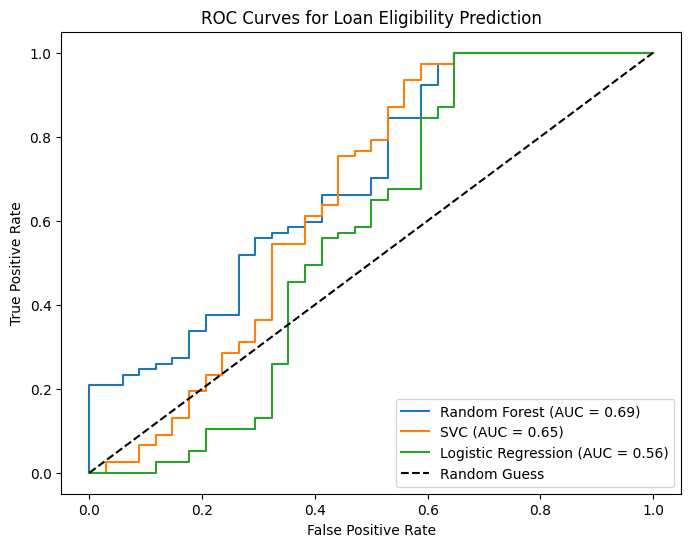

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming X, y, best_rf, best_svc_reg, and best_log_reg are already defined

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot ROC curve
def plot_roc_curve(model, model_name):
    model.fit(X_train, y_train)  # Train the model if not already trained

    # Check if the model has predict_proba method (for SVC with probability=True)
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    else:
        # For models without predict_proba (like SVC with probability=False), use decision function
        y_pred_prob = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plot_roc_curve(best_rf, "Random Forest")
plot_roc_curve(best_svc_reg, "SVC")
plot_roc_curve(best_log_reg, "Logistic Regression")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Loan Eligibility Prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
final_model_1=best_rf
final_model_2=best_svc_reg
final_model_3=best_log_reg

In [ ]:
import joblib

# Save the trained model
joblib.dump(final_model_1, 'Loan_status_predictor_rf.pkl')

# Load the model (to verify)
loaded_model = joblib.load('Loan_status_predictor_rf.pkl')


In [ ]:
joblib.dump(scaler,"vector.pkl")

['vector.pkl']

In [ ]:
# !pip install shap matplotlib pandas scikit-learn
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load trained model and scaler
model = joblib.load("Loan_status_predictor_rf.pkl")
scaler = joblib.load("vector.pkl")

# Load new data
df = pd.read_csv("New loan data.csv")
df = df.drop(columns=["Loan_ID"], errors='ignore')

# Replace categorical values with numerical encoding
encoding = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4},  # Handle '3+'
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Loan_Status': {'Y': 1, 'N': 0},  # Only if Loan_Status is still in df
}
df.replace(encoding, inplace=True)

# Apply feature scaling to numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols] = scaler.transform(df[num_cols])

# Get feature names used during training
X_train_columns = model.feature_names_in_

# Ensure X_shap has the same columns as the model was trained on and in the correct order
X_shap = df[X_train_columns]

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)

# Calculate mean absolute SHAP values for feature importance
# Use shap_values[1] for positive class (assuming binary classification)

# Ensure that the shap_values have the expected shape for binary classification
if len(shap_values) == 2:  # Check if shap_values has separate values for each class
    shap_importance = pd.DataFrame({
        'feature': X_shap.columns,
        'importance': np.abs(shap_values[1]).mean(axis=0)  # Use shap_values[1] for positive class
    }).sort_values(by='importance', ascending=False)
else:
    # Handle the case where shap_values doesn't have separate values for each class
    # Reshape shap_values to 2D before calculating mean
    shap_values_reshaped = shap_values.reshape(shap_values.shape[0], -1)
    shap_importance = pd.DataFrame({
        'feature': X_shap.columns,
        'importance': np.abs(shap_values_reshaped).mean(axis=0)  # Use the absolute values directly
    }).sort_values(by='importance', ascending=False)

# Plot top 5 important features
top5 = shap_importance.head(5)
plt.figure(figsize=(8, 5))
plt.barh(top5['feature'][::-1], top5['importance'][::-1], color='skyblue')
plt.xlabel("Mean |SHAP value|")
plt.title("Top 5 Important Features Influencing Loan Approval")
plt.tight_layout()
plt.show()

<ipython-input-15-48560d487152>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


ValueError: All arrays must be of the same length

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()
model = joblib.load("Loan_status_predictor_rf.pkl")
scaler = joblib.load("vector.pkl")

class LoanData(BaseModel):
    Gender: int
    Married: int
    Dependents: int
    Education: int
    Self_Employed: int
    ApplicantIncome: float
    CoapplicantIncome: float
    LoanAmount: float
    Loan_Amount_Term: float
    Credit_History: int
    Property_Area: int

@app.post("/predict")
def predict(data: LoanData):
    input_data = [[
        data.Gender, data.Married, data.Dependents, data.Education,
        data.Self_Employed, data.ApplicantIncome, data.CoapplicantIncome,
        data.LoanAmount, data.Loan_Amount_Term, data.Credit_History,
        data.Property_Area
    ]]

    input_data = np.array(input_data)
    input_data[:, 5:9] = scaler.transform(input_data[:, 5:9])

    prediction = model.predict(input_data)
    return {"loan_status": "Approved" if prediction[0] == 1 else "Rejected"}


ModuleNotFoundError: No module named 'fastapi'

In [ ]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load model and scaler
model = joblib.load("Loan_status_predictor_rf.pkl")
scaler = joblib.load("vector.pkl")

# Load and preprocess data
df = pd.read_csv("New loan data.csv")
df = df.drop(columns=["Loan_ID"], errors='ignore')

# Replace categorical with numeric
encoding = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
}
df = df.replace(encoding).infer_objects(copy=False)

# Scale numeric features
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols] = scaler.transform(df[num_cols])

X = df[model.feature_names_in_]

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


# Select SHAP values for the desired class (e.g., class 1 for binary classification)
shap_values_class1 = shap_values[1]  # Assuming binary classification with classes 0 and 1

# SHAP summary plot (beeswarm) for the selected class
shap.summary_plot(shap_values_class1, X, plot_type="dot", show=True)  # Use shap_values_class1 for plotting

<ipython-input-18-25fd2f64c897>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encoding).infer_objects(copy=False)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import joblib

def analyze_rural_rejection_rate():
    # Load dataset
    df = pd.read_csv("New loan data.csv")

    # Drop identifier if present
    df = df.drop(columns=['Loan_ID'], errors='ignore')

    # Encode Loan_Status if it's in 'Y'/'N' format
    if df['Loan_Status'].dtype == 'object':
        df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # Check if 'Property_Area' column exists
    if 'Property_Area' not in df.columns:
        print("❌ 'Property_Area' column not found in dataset.")
        return

    # Group by Property_Area and calculate rejection statistics
    area_stats = df.groupby('Property_Area')['Loan_Status'].agg(
        total_applicants='count',
        approved='sum'
    )
    area_stats['rejected'] = area_stats['total_applicants'] - area_stats['approved']
    area_stats['rejection_rate'] = area_stats['rejected'] / area_stats['total_applicants']

    print("\n🔍 Rejection Rates by Property Area:")
    print(area_stats[['total_applicants', 'rejected', 'rejection_rate']])

    # Compare rural with urban and semiurban
    try:
        rural_rate = area_stats.loc['Rural', 'rejection_rate']
        urban_rate = area_stats.loc['Urban', 'rejection_rate']
        semiurban_rate = area_stats.loc['Semiurban', 'rejection_rate']

        print("\n📊 Comparison:")
        print(f"Rural rejection rate     : {rural_rate:.2%}")
        print(f"Urban rejection rate     : {urban_rate:.2%}")
        print(f"Semiurban rejection rate : {semiurban_rate:.2%}")

        if rural_rate > max(urban_rate, semiurban_rate):
            print("\n✅ Rural applicants face a higher rejection rate.")
        else:
            print("\n❌ Rural applicants do not face the highest rejection rate.")
    except KeyError:
        print("\n❗ One or more areas (Rural, Urban, Semiurban) are missing in the data.")

# Call the function
analyze_rural_rejection_rate()



🔍 Rejection Rates by Property Area:
               total_applicants  rejected  rejection_rate
Property_Area                                            
Rural                       179        69        0.385475
Semiurban                   233        54        0.231760
Urban                       202        69        0.341584

📊 Comparison:
Rural rejection rate     : 38.55%
Urban rejection rate     : 34.16%
Semiurban rejection rate : 23.18%

✅ Rural applicants face a higher rejection rate.


In [ ]:
# !pip install shap matplotlib pandas scikit-learn
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load trained model and scaler
model = joblib.load("Loan_status_predictor_rf.pkl")
scaler = joblib.load("vector.pkl")

# Load data
df = pd.read_csv("New loan data.csv")
df = df.drop(columns=["Loan_ID"], errors='ignore')

# Encode categorical values (should match training-time encoding)
encoding = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Loan_Status': {'Y': 1, 'N': 0}
}
df = df.replace(encoding).infer_objects(copy=False)

# Scale numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols] = scaler.transform(df[num_cols])

# Prepare features (ensure same columns as model)
X = df[model.feature_names_in_]

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Use SHAP values for the positive class (loan approved = 1)
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

# Compute mean absolute SHAP values
mean_shap = np.abs(shap_vals).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': mean_shap
}).sort_values(by='importance', ascending=False)

# Top 5 features
top5 = feature_importance.head(5)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(top5['feature'][::-1], top5['importance'][::-1], color='skyblue')
plt.xlabel("Mean |SHAP value|")
plt.title("Top 5 Features Influencing Loan Approval")
plt.tight_layout()
plt.show()


<ipython-input-21-5de799608265>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encoding).infer_objects(copy=False)


ValueError: Per-column arrays must each be 1-dimensional